In [1]:
import librosa
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
# Load your FLAC file
file_path = r"C:\01. Vitalic.flac"
y, sr = librosa.load(file_path, sr=None)  # sr=None preserves the original sample rate
print(f"Audio data shape: {y.shape}, Sample rate: {sr}")


Audio data shape: (4980948,), Sample rate: 44100


MFCC shape: (13, 9729)


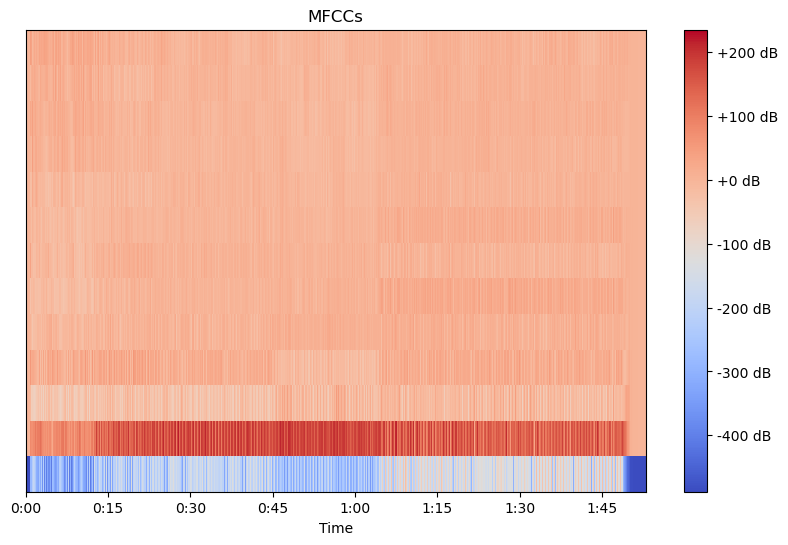

In [3]:
# Extract MFCC (Mel-frequency cepstral coefficients) features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCCs
print(f"MFCC shape: {mfcc.shape}")

# Visualize the MFCC features
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()

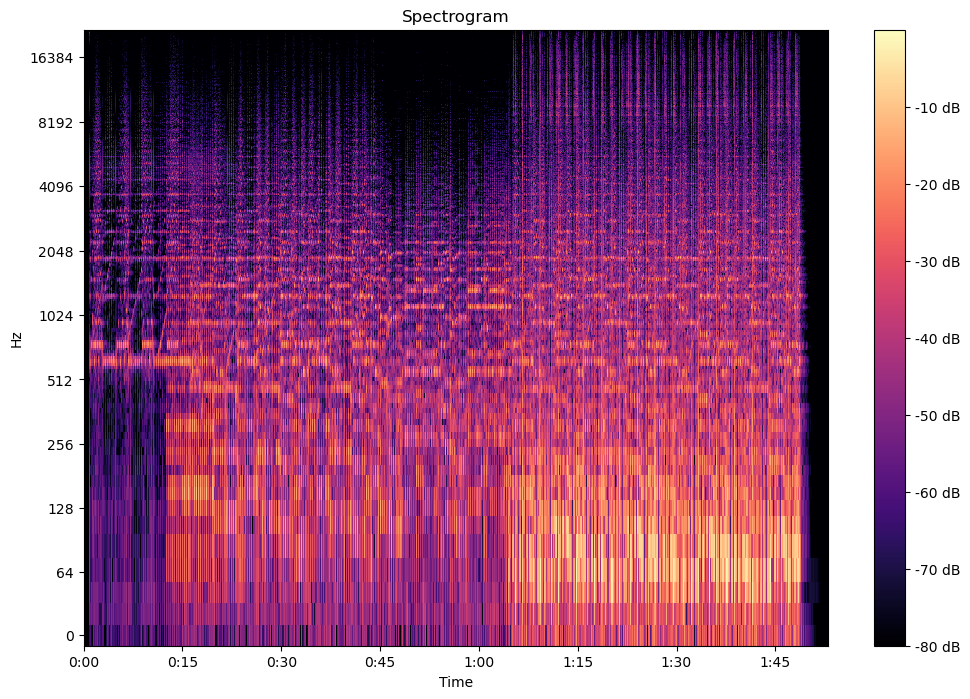

In [4]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude to decibels for better visualization
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Visualize the Spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


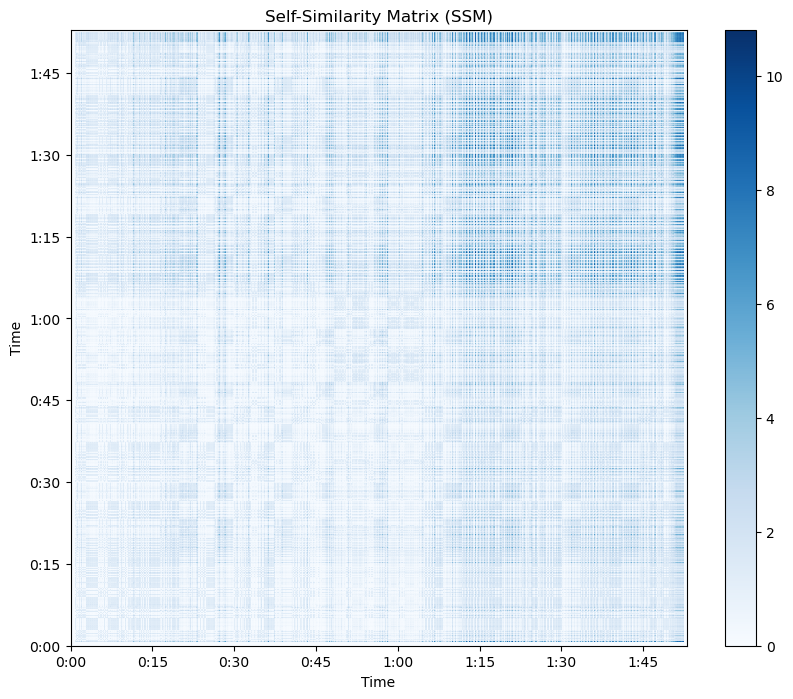

In [5]:
# Compute the chromagram of the audio signal
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=2048, hop_length=512)

# Compute the Self-Similarity Matrix (SSM)
# We will calculate the pairwise similarity between columns of the chromagram using the cosine similarity
ssm = np.inner(chromagram.T, chromagram.T)

# Plot the Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix (SSM)')
plt.show()

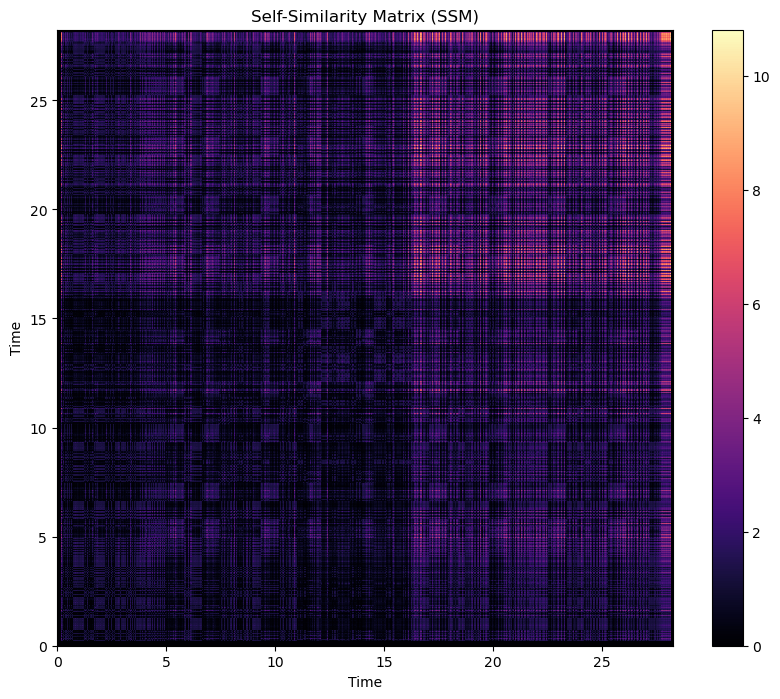

In [6]:
# Compute the chromagram of the audio signal with a larger hop_length (reduces resolution)
hop_length = 2048  # Increase hop length to reduce resolution (you can experiment with this)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=2048, hop_length=hop_length)

# Compute the Self-Similarity Matrix (SSM)
ssm = np.inner(chromagram.T, chromagram.T)

# Plot the Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix (SSM)')
plt.show()


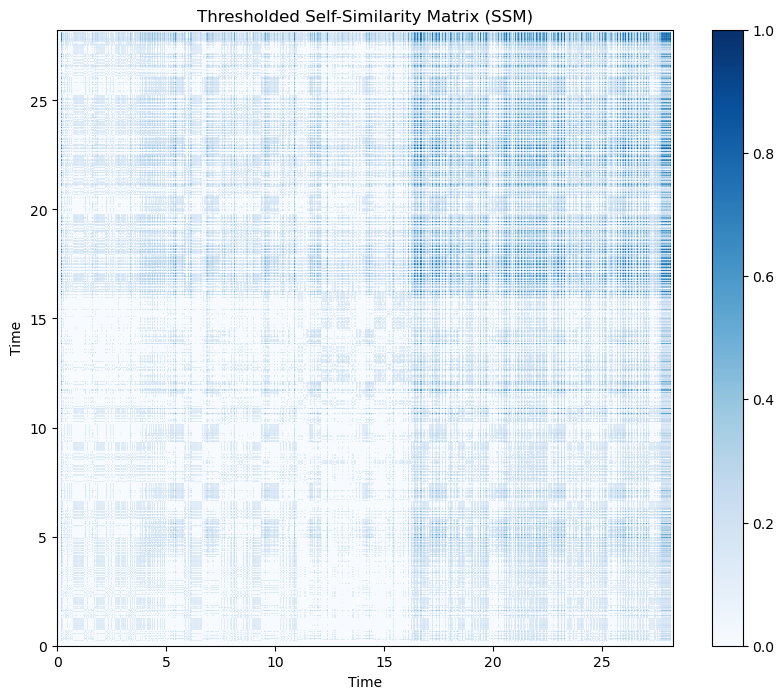

In [7]:
# Normalize the SSM
ssm_normalized = (ssm - np.min(ssm)) / (np.max(ssm) - np.min(ssm))

# Apply a threshold to remove small values
threshold = 0.1
ssm_thresholded = np.where(ssm_normalized > threshold, ssm_normalized, 0)

# Plot the thresholded Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm_thresholded, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Thresholded Self-Similarity Matrix (SSM)')
plt.show()


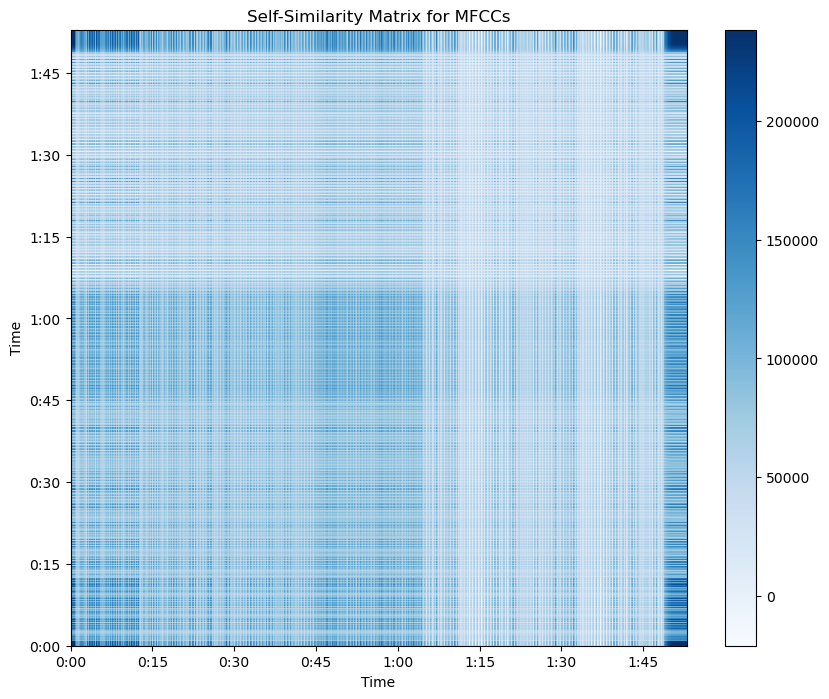

In [8]:
# Compute MFCC features with fewer coefficients (e.g., 5 instead of 13)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)

# Compute the Self-Similarity Matrix for MFCCs
ssm_mfcc = np.inner(mfcc.T, mfcc.T)

# Plot the Self-Similarity Matrix for MFCCs
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm_mfcc, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix for MFCCs')
plt.show()
